# Building dataframe


Import needed library for learning model

In [89]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet


Build dataframe for training set

In [90]:
dataframe = pd.read_csv('C:\\Users\\LamPhuss\\Code\\Python\\ML_Projects-main\\ML_Projects-main\\src\\divde\\output_files_0.csv')
dataframe.head()

,make,model,variant,car_price,car_title,car_sub_title,year,reg,body_type,miles,engine_vol,engine_size,transmission,feul_type,num_owner,ulez
0,AC,Cobra,NaN,89995,AC Cobra,4.9 MK IV CRS 2dr,2001.0,X reg,convertible,14400.0,4.9,225.0,manual,petrol,5.0,0
1,AC,Cobra,NaN,92500,AC Cobra,378 - MkIV,2019.0,T reg,convertible,650.0,NaN,NaN,manual,petrol,NaN,0
2,AC,Cobra,NaN,109995,AC Cobra,MK1V 212 SC. 3.5 V8 350 BHP LOTUS TWIN TURBO. ...,2000.0,X reg,convertible,21600.0,3.5,NaN,manual,petrol,3.0,0
3,AC,Cobra,NaN,124950,AC Cobra,302 MKIV 2dr,1989.0,F reg,convertible,2750.0,NaN,NaN,manual,petrol,NaN,0
4,AC,Cobra,NaN,124950,AC Cobra,302 MKIV With Factory Lightweight Engine 5.0 2dr,1989.0,E reg,convertible,15142.0,5.0,NaN,manual,petrol,NaN,0


# Data Analysis and Preprocessing

## Check collumns and shapes in dataframe

In [91]:
dataframe.columns

Index(['make', 'model', 'variant', 'car_price', 'car_title', 'car_sub_title',
       'year', 'reg', 'body_type', 'miles', 'engine_vol', 'engine_size',
       'transmission', 'feul_type', 'num_owner', 'ulez'],
      dtype='object')

we can drop "Customer_Id" column since it does not affect the price.

In [ ]:
dataframe.drop('Customer_Id', axis=1, inplace=True)

In [92]:
print("There are " + str(dataframe.shape[0]) + " rows and " + str(dataframe.shape[1]) + " columns")

There are 818456 rows and 16 columns


## Describe some basic statistical values

In [93]:
dataframe.describe()

,car_price,year,miles,engine_vol,engine_size,num_owner,ulez
count,8.184560e+05,770376.000000,763703.000000,803010.000000,814247.000000,442596.000000,818456.000000
mean,2.011859e+04,2016.031000,48735.854328,1.860284,170.134123,2.097290,0.815449
std,2.224110e+04,5.531332,36520.141907,0.752763,92.141443,1.265622,0.387933
min,3.000000e+02,32.000000,2.000000,0.500000,1.000000,1.000000,0.000000
25%,8.990000e+03,2014.000000,19441.000000,1.400000,115.000000,1.000000,1.000000
50%,1.500000e+04,2017.000000,40267.000000,1.600000,148.000000,2.000000,1.000000
75%,2.450000e+04,2019.000000,71215.500000,2.000000,190.000000,3.000000,1.000000
max,3.199830e+06,2022.000000,999999.000000,8.300000,2460.000000,32.000000,1.000000


## Describe summary of data frame 

In [94]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818456 entries, 0 to 818455
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   make           818456 non-null  object 
 1   model          818153 non-null  object 
 2   variant        816207 non-null  object 
 3   car_price      818456 non-null  int64  
 4   car_title      818456 non-null  object 
 5   car_sub_title  817909 non-null  object 
 6   year           770376 non-null  float64
 7   reg            747436 non-null  object 
 8   body_type      817744 non-null  object 
 9   miles          763703 non-null  float64
 10  engine_vol     803010 non-null  float64
 11  engine_size    814247 non-null  float64
 12  transmission   818243 non-null  object 
 13  feul_type      818234 non-null  object 
 14  num_owner      442596 non-null  float64
 15  ulez           818456 non-null  int64  
dtypes: float64(5), int64(2), object(9)
memory usage: 99.9+ MB


## Handling outliers

In [95]:
train_outliers=dataframe.select_dtypes(include=['int', 'float'])

train_outliers.head()


,car_price,year,miles,engine_vol,engine_size,num_owner,ulez
0,89995,2001.0,14400.0,4.9,225.0,5.0,0
1,92500,2019.0,650.0,NaN,NaN,NaN,0
2,109995,2000.0,21600.0,3.5,NaN,3.0,0
3,124950,1989.0,2750.0,NaN,NaN,NaN,0
4,124950,1989.0,15142.0,5.0,NaN,NaN,0


In [96]:
dataframe.select_dtypes(include=['int', 'float']).columns.tolist()


['car_price',
 'year',
 'miles',
 'engine_vol',
 'engine_size',
 'num_owner',
 'ulez']

In [97]:
train_outliers = dataframe.filter( ['year',
 'miles',
 'engine_vol',
 'engine_size',
 'num_owner',
 ],axis=1)

In [98]:
for col in train_outliers:
    q1 = train_outliers[col].quantile(0.25)
    q3 = train_outliers[col].quantile(0.75)
    iqr = q3 - q1
    range_low = q1 - 1.5 * iqr
    range_high = q3 + 1.5 * iqr
    outliers = dataframe[(dataframe[col] < range_low) | (dataframe[col] > range_high)]
    print("NUmber of outliers in " + str(col) + " is : " + str(len(outliers)))
    

NUmber of outliers in year is : 24285
NUmber of outliers in miles is : 9350
NUmber of outliers in engine_vol is : 96139
NUmber of outliers in engine_size is : 66498
NUmber of outliers in num_owner is : 3856


Display the distribution of values in each column of a dataset and highlight outliers by boxplot chart

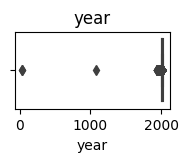

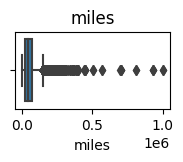

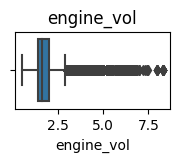

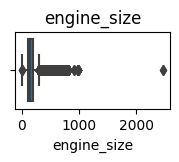

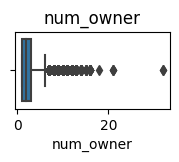

In [99]:

for col in train_outliers:
    plt.figure(figsize=(2,1))
    sns.boxplot(x=dataframe[col], whis=1.5)
    plt.title(col)
    plt.show()

Replace all outliers

In [100]:
for col in train_outliers:
    q1 = train_outliers[col].quantile(0.25)
    q3 = train_outliers[col].quantile(0.75)
    iqr = q3 - q1
    range_low = q1 - 1.5 * iqr
    range_high = q3 + 1.5 * iqr
    dataframe = dataframe[(dataframe[col] >= range_low) & (dataframe[col] <= range_high)]
    outliers = dataframe[(dataframe[col] < range_low) | (dataframe[col] > range_high)]
    print("NUmber of outliers in " + str(col) + " is : " + str(len(outliers)))

NUmber of outliers in year is : 0
NUmber of outliers in miles is : 0
NUmber of outliers in engine_vol is : 0
NUmber of outliers in engine_size is : 0
NUmber of outliers in num_owner is : 0


Display the distribution of values in each column of a dataset and highlight outliers by boxplot chart after replaced all outliers

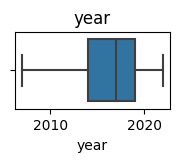

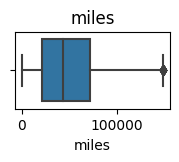

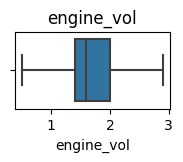

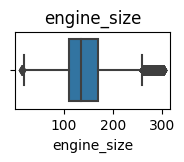

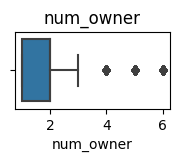

In [138]:
for col in train_outliers:
    plt.figure(figsize=(2,1))
    sns.boxplot(x=dataframe[col], whis=1.5)
    plt.title(col)
    plt.show()

In [101]:
dataframe.shape

(355752, 16)

## Handle missing value

Get all columns that have missing values

In [103]:
dataframe.columns[dataframe.isna().any()].tolist()

['model', 'variant', 'reg', 'body_type']

In [104]:
train_missings = dataframe.filter(
['model', 'variant', 'reg', 'body_type' ],axis=1)

In [105]:
print("Missing-value rate of train data:")
mis_val_train = train_missings.isnull().sum() / len(train_missings) * 100
print(mis_val_train)

Missing-value rate of train data:
model        0.025861
variant      0.014055
reg          2.221491
body_type    0.053689
dtype: float64


We will drop all records that contain missing values

In [106]:
dataframe.dropna(inplace= True)

Checking missing data again

In [107]:
print("Number of columns that have NaN values are : " + str(len(dataframe.columns[dataframe.isna().any()].tolist())))

Number of columns that have NaN values are : 0



All NaN values have been handled ,so we have done this step

In [108]:
dataframe.shape

(347520, 16)

## Encoding labels

Get all columns that contain object-type values

In [109]:
encoding_col = dataframe.select_dtypes(include='object')
encoding_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 347520 entries, 8 to 817784
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   make           347520 non-null  object
 1   model          347520 non-null  object
 2   variant        347520 non-null  object
 3   car_title      347520 non-null  object
 4   car_sub_title  347520 non-null  object
 5   reg            347520 non-null  object
 6   body_type      347520 non-null  object
 7   transmission   347520 non-null  object
 8   feul_type      347520 non-null  object
dtypes: object(9)
memory usage: 26.5+ MB


Encoding all object-type then recheck

In [111]:
le = LabelEncoder()
for col in encoding_col:
    le.fit(encoding_col[col].astype(str))
    dataframe[col] = le.transform(encoding_col[col].astype(str))
dataframe.info()



<class 'pandas.core.frame.DataFrame'>
Index: 347520 entries, 8 to 817784
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   make           347520 non-null  int32  
 1   model          347520 non-null  int32  
 2   variant        347520 non-null  int32  
 3   car_price      347520 non-null  int64  
 4   car_title      347520 non-null  int32  
 5   car_sub_title  347520 non-null  int32  
 6   year           347520 non-null  float64
 7   reg            347520 non-null  int32  
 8   body_type      347520 non-null  int32  
 9   miles          347520 non-null  float64
 10  engine_vol     347520 non-null  float64
 11  engine_size    347520 non-null  float64
 12  transmission   347520 non-null  int32  
 13  feul_type      347520 non-null  int32  
 14  num_owner      347520 non-null  float64
 15  ulez           347520 non-null  int64  
dtypes: float64(5), int32(9), int64(2)
memory usage: 33.1 MB


## Choose appopriate columns

Fetching heatmap figure

Text(0.5, 1.0, 'Correlation between the columns')

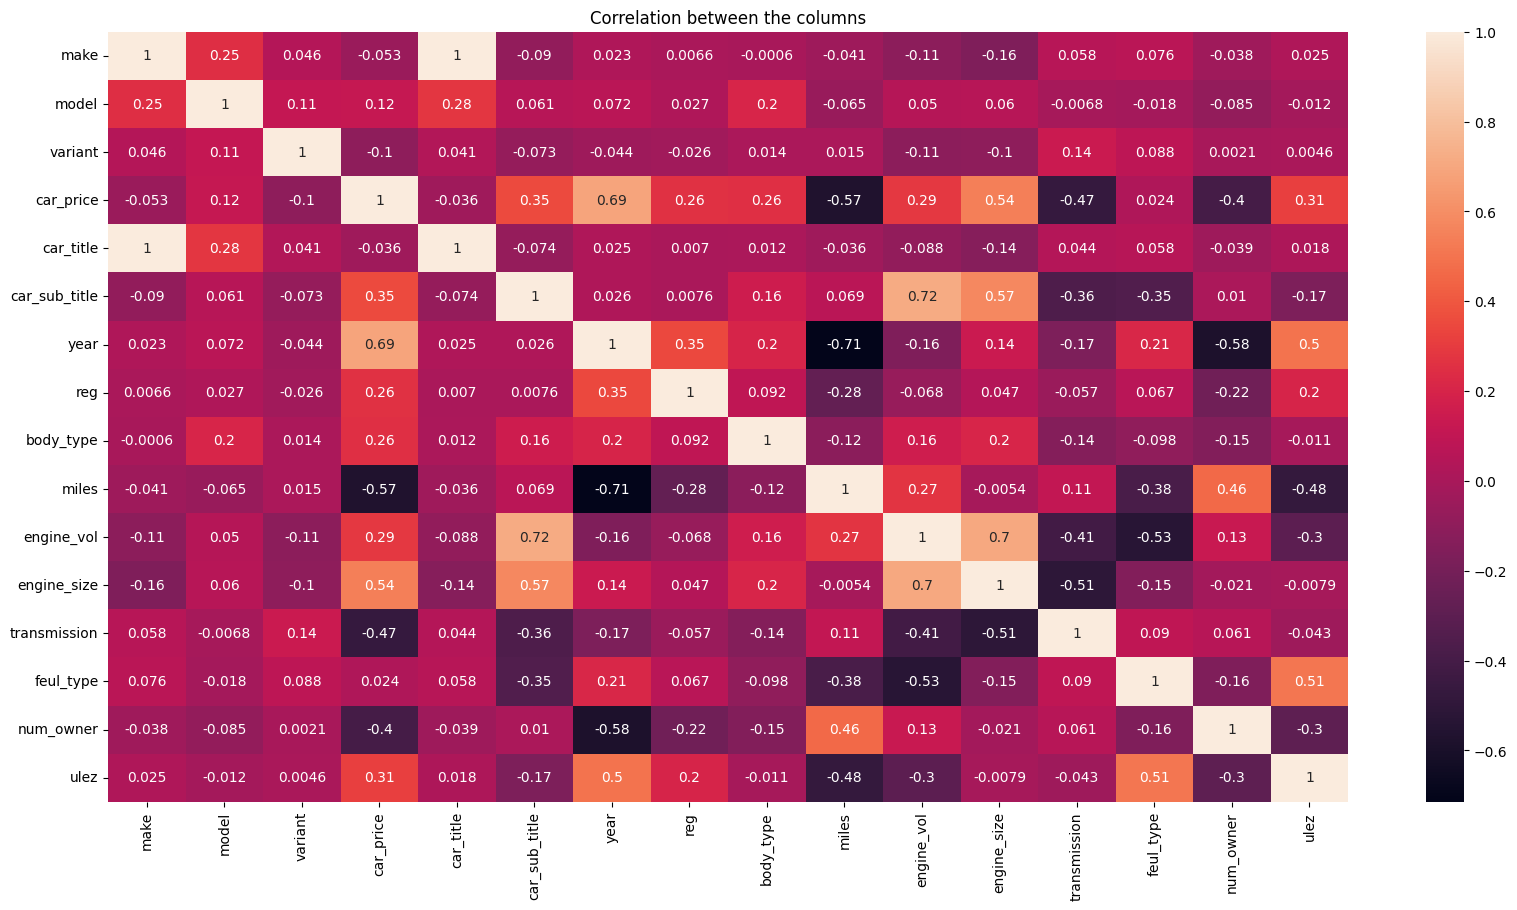

In [112]:
plt.figure(figsize=(20,10))
sns.heatmap(dataframe.corr(),annot=True)
plt.title("Correlation between the columns")

In [113]:
corr_matrix = dataframe.corr()['car_price']

Get top 10 features that will be used for the regressions models

In [114]:
top_10_cols = corr_matrix.abs().nlargest(11).iloc[1:].index

In [115]:
y = dataframe['car_price'].values

In [116]:
dataframe = dataframe.drop(columns=dataframe.columns.difference(top_10_cols))
dataframe['car_price'] = y

In [118]:
dataframe.columns

Index(['car_sub_title', 'year', 'reg', 'body_type', 'miles', 'engine_vol',
       'engine_size', 'transmission', 'num_owner', 'ulez', 'car_price'],
      dtype='object')

## Splitting data into train and test

In [119]:
y = dataframe['car_price']
X = dataframe.drop(columns=['car_price'],axis=1)

y.head()

8     24275
9     24275
10    25000
12    15995
13    16195
Name: car_price, dtype: int64

In [120]:
# 60% train ,20% validation ,20% test 
X_train_or, X_test, y_train_or, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_or, y_train_or, test_size=0.2)
print(X_train.shape)
print(y_val.shape)


(222412, 10)
(55604,)


In [121]:
X_train.head()

,car_sub_title,year,reg,body_type,miles,engine_vol,engine_size,transmission,num_owner,ulez
488101,58214,2017.0,10,13,39165.0,2.1,177.0,0,2.0,1
93276,38137,2015.0,24,4,63500.0,2.0,184.0,0,2.0,1
150082,28320,2011.0,4,6,128300.0,1.6,110.0,1,5.0,0
555736,23570,2014.0,24,13,72030.0,1.5,110.0,1,2.0,0
432607,24768,2018.0,11,6,19500.0,1.6,102.0,1,1.0,1


# Training the model

Bulding function needed to get metrics for val set

In [122]:
def get_metrics(model):
    print(f'Train score {model.score(X_train, y_train)}')
    print(f'Val score {model.score(X_val, y_val)}')
    print("MAE:" , metrics.mean_absolute_error(y_val,model.predict(X_val)))
    print("MSE:" , metrics.mean_squared_error(y_val,model.predict(X_val)))
    print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_val,model.predict(X_val))))
    



## Basic Linear Regression

In [123]:
lr = LinearRegression()
lr.fit(X_train, y_train)
score = lr.score(X_val, y_val)
get_metrics(lr)

Train score 0.7476020956810228
Val score 0.7425391394026979
MAE: 3227.516976506009
MSE: 24607610.997504544
RMSE: 4960.605910320285


## Lasso

In [124]:
ls = Lasso()
ls.fit(X_train, y_train)
get_metrics(ls)

Train score 0.7476016471897291
Val score 0.7425367742450018
MAE: 3227.160453883675
MSE: 24607837.054701727
RMSE: 4960.628695508436


## Ridge

In [125]:
rd = Ridge()
rd.fit(X_train, y_train)
get_metrics(rd)

Train score 0.7476020956004363
Val score 0.7425391264398233
MAE: 3227.510193697336
MSE: 24607612.236471016
RMSE: 4960.606035200842


## Random forest

In [126]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf.fit(X_train,y_train)
get_metrics(rf)


Train score 0.9963202779605149
Val score 0.9749822481916468
MAE: 824.9856028708888
MSE: 2391148.320967435
RMSE: 1546.333832316759


## Keras model

In [127]:
from sklearn.metrics import r2_score
from tensorflow import keras

Define the neural network model architecture

In [128]:

kr = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=[10]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

Compile the model with appropriate loss function and optimizer

In [129]:
# Compile the model with appropriate loss function and optimizer
kr.compile(loss='mean_squared_error', optimizer='adam')

Define a callback to show the progress (number of epoch)

In [130]:

class ProgressCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0:
            print("Epoch {}: loss = {:.4f}".format(epoch, logs['loss']))

Train the model on the training data

In [131]:

kr.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, callbacks=[ProgressCallback()])

Epoch 0: loss = 43288752.0000
Epoch 10: loss = 27626594.0000
Epoch 20: loss = 25890686.0000
Epoch 30: loss = 25007304.0000
Epoch 40: loss = 24462274.0000
Epoch 50: loss = 24068228.0000
Epoch 60: loss = 23829870.0000
Epoch 70: loss = 23691848.0000
Epoch 80: loss = 23432386.0000
Epoch 90: loss = 23234246.0000


Use the trained model to make predictions on the testing data

In [132]:

predictions = kr.predict(X_val)

1738/1738 [==============================] - 1s 501us/step


In [137]:
print(f'Train score {r2_score(y_train,kr.predict(X_train) )}')
print(f'Val score {r2_score(y_val, predictions)}')
print("MAE:" , metrics.mean_absolute_error(y_val,kr.predict(X_val)))
print("MSE:" , metrics.mean_squared_error(y_val,kr.predict(X_val)))
print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_val,kr.predict(X_val))))

6951/6951 [==============================] - 4s 505us/step
Train score 0.7554064282413402
Val score 0.7503061768406509
1738/1738 [==============================] - 1s 491us/step
MAE: 3248.9375716979775
1738/1738 [==============================] - 1s 488us/step
MSE: 23865252.58452949
1738/1738 [==============================] - 1s 488us/step
RMSE: 4885.207527273482
